In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Obtain POS Data

In [50]:
asdPOS = pd.read_csv("../confidential/ASD_POS_stats.csv")
controlsPOS = pd.read_csv("../confidential/controls_POS_stats.csv")

We'll want to have the sum of all parts of speech to see proportions.

In [51]:
asdPOS['sum']=asdPOS.sum(axis=1)
asdPOS = asdPOS[asdPOS["sum"] != 0]

controlsPOS['sum']=controlsPOS.sum(axis=1)
controlsPOS = controlsPOS[controlsPOS["sum"] != 0]

We're interested particularly in pronouns: 

* personal pronouns (he, I) are represented by PRP
* possessive pronouns (my, yours) by PRP\$
* wh-type pronouns (who, whom) by WP
* wh-type posessive pronouns (whose) by WP\$

In [52]:
pronouns = ["POS", "PRP", "PRP$", "WP", "WP$","sum"]

Let's peek at what our POS data frames look like. Because the dollar sign causes problems in rendering Jupyter notebooks in GitHub, we'll replace it before proceeding.

In [53]:
asdPOS=asdPOS[pronouns]
asdPOS=asdPOS.rename(columns={'POS' : 'possessive-endings','PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
asdPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
0,10.0,17928.0,6795.0,2336.0,36.0,398494.0
1,NaN,768.0,358.0,113.0,1.0,17150.0
2,NaN,969.0,521.0,77.0,NaN,19598.0
3,NaN,76.0,40.0,1.0,NaN,1549.0
4,NaN,4036.0,2355.0,654.0,5.0,111169.0


In [54]:
controlsPOS=controlsPOS[pronouns]
controlsPOS=controlsPOS.rename(columns={'POS' : 'possessive-endings', 'PRP': 'personal', 'PRP$': 'possessive', 'WP': 'wh-non-possessive', 'WP$': 'wh-possessive'})
controlsPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum
0,NaN,19.0,20.0,1.0,1.0,2966.0
1,NaN,7559.0,3562.0,632.0,12.0,240264.0
2,2.0,8039.0,3050.0,838.0,11.0,213099.0
3,11.0,5229.0,1959.0,770.0,6.0,106342.0
4,9.0,1439.0,847.0,91.0,1.0,28770.0


Let's create percentage-of-total columns.

In [55]:
asdPOS = asdPOS.join(asdPOS.div(asdPOS['sum'], axis=0), rsuffix='_pct')
asdPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
0,10.0,17928.0,6795.0,2336.0,36.0,398494.0,0.000025,0.044989,0.017052,0.005862,0.000090,1.0
1,NaN,768.0,358.0,113.0,1.0,17150.0,NaN,0.044781,0.020875,0.006589,0.000058,1.0
2,NaN,969.0,521.0,77.0,NaN,19598.0,NaN,0.049444,0.026584,0.003929,NaN,1.0
3,NaN,76.0,40.0,1.0,NaN,1549.0,NaN,0.049064,0.025823,0.000646,NaN,1.0
4,NaN,4036.0,2355.0,654.0,5.0,111169.0,NaN,0.036305,0.021184,0.005883,0.000045,1.0


In [56]:
controlsPOS = controlsPOS.join(controlsPOS.div(controlsPOS['sum'], axis=0), rsuffix='_pct')
controlsPOS.head()

,possessive-endings,personal,possessive,wh-non-possessive,wh-possessive,sum,possessive-endings_pct,personal_pct,possessive_pct,wh-non-possessive_pct,wh-possessive_pct,sum_pct
0,NaN,19.0,20.0,1.0,1.0,2966.0,NaN,0.006406,0.006743,0.000337,0.000337,1.0
1,NaN,7559.0,3562.0,632.0,12.0,240264.0,NaN,0.031461,0.014825,0.002630,0.000050,1.0
2,2.0,8039.0,3050.0,838.0,11.0,213099.0,0.000009,0.037724,0.014313,0.003932,0.000052,1.0
3,11.0,5229.0,1959.0,770.0,6.0,106342.0,0.000103,0.049172,0.018422,0.007241,0.000056,1.0
4,9.0,1439.0,847.0,91.0,1.0,28770.0,0.000313,0.050017,0.029440,0.003163,0.000035,1.0


/Users/paytonk/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


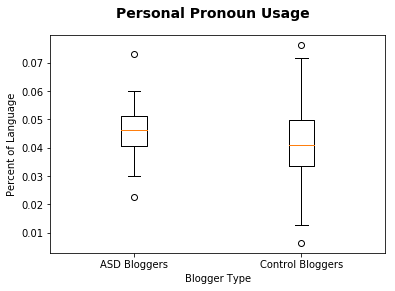

In [57]:
fig = plt.figure()
fig.suptitle('Personal Pronoun Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["personal_pct"].dropna(),controlsPOS["personal_pct"].dropna()], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

/Users/paytonk/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


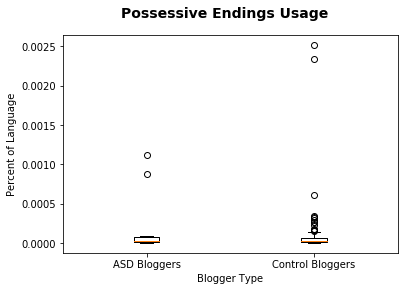

In [58]:
fig = plt.figure()
fig.suptitle('Possessive Endings Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["possessive-endings_pct"].dropna(),controlsPOS["possessive-endings_pct"].dropna()], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

/Users/paytonk/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


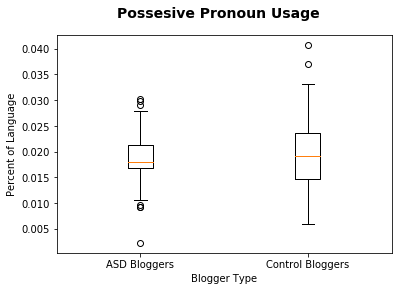

In [59]:
fig = plt.figure()
fig.suptitle('Possesive Pronoun Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["possessive_pct"].dropna(),controlsPOS["possessive_pct"].dropna()], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()

/Users/paytonk/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


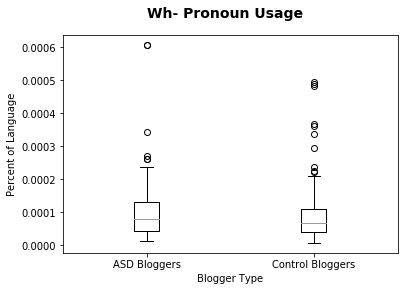

In [60]:
fig = plt.figure()
fig.suptitle('Wh- Pronoun Usage', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot([asdPOS["wh-possessive_pct"].dropna(),controlsPOS["wh-possessive_pct"].dropna()], labels=["ASD Bloggers", "Control Bloggers"])

ax.set_xlabel('Blogger Type')
ax.set_ylabel('Percent of Language')

plt.show()